In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import friedmanchisquare

In [14]:
from matplotlib.font_manager import findSystemFonts, FontProperties

# Check if Times New Roman is available
fonts = findSystemFonts()
for f in fonts:
    if "Times New Roman" in f:
        print(f"Found Times New Roman at {f}")
        break
else:
    print("Times New Roman not found.")


Times New Roman not found.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from matplotlib import font_manager

# Set font globally (alternative method)
plt.rcParams.update({'font.family':'Times New Roman'})

# Assuming 'data' is your DataFrame after reading from CSV
data = pd.read_csv('round_duration.csv')

# Perform the friedman test
stat = friedmanchisquare(data['Eye_Gaze_Hands'], data['Neuro_Gaze'], data['VR_Controllers'])
print(stat)

# Melt the DataFrame to long format
data_long = data.melt(value_vars=['Eye_Gaze_Hands', 'Neuro_Gaze', 'VR_Controllers'],
                      var_name='Input Device', value_name='Task Completion Time (s)')

# Set the style of the plot
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with error bars, specifying the order you want
ax = sns.barplot(x='Input Device', y='Task Completion Time (s)', data=data_long,
                 ax=ax, errorbar=('ci',95), 
                 order=['Eye_Gaze_Hands', 'VR_Controllers', 'Neuro_Gaze'])

# Explicitly set font properties here if needed
ax.set_xticklabels(['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze'], fontname="Times New Roman")
ax.set_xlabel('Input Device', fontname="Times New Roman")
ax.set_ylabel('Task Completion Time (s)', fontname="Times New Roman")
ax.set_title('Average Task Completion Time by Input Devices', fontname="Times New Roman")

# Show the plot
plt.show()


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

FriedmanchisquareResult(statistic=100.15384615384619, pvalue=1.7859472896518456e-22)


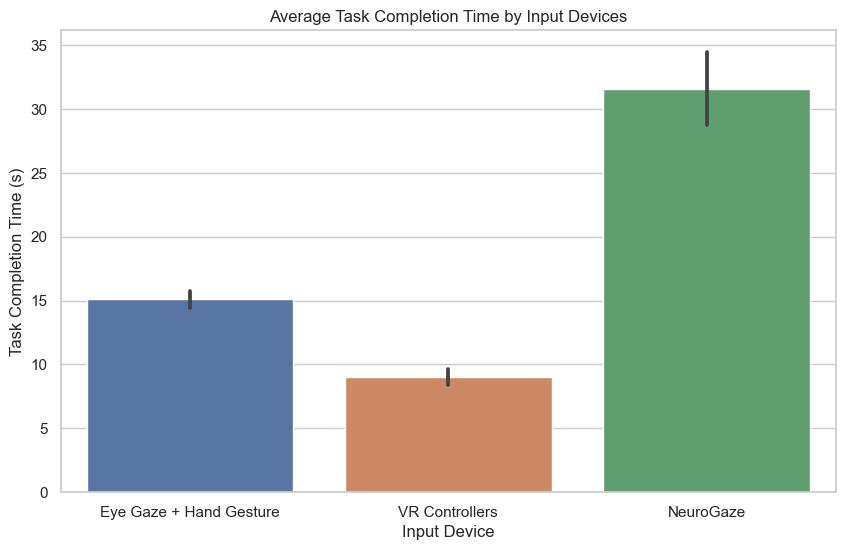

In [ ]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import friedmanchisquare

# Load your DataFrame
data = pd.read_csv('round_duration.csv')

# Perform the friedman test
stat = friedmanchisquare(data['Eye_Gaze_Hands'], data['Neuro_Gaze'], data['VR_Controllers'])
print(stat)

# Specify the full path to your Times New Roman font file
times_new_roman_font_path = '/path/to/TimesNewRoman.ttf'  # Update this path
times_font = FontProperties(fname=times_new_roman_font_path)

# Melt the DataFrame to long format for plotting
data_long = data.melt(value_vars=['Eye_Gaze_Hands', 'Neuro_Gaze', 'VR_Controllers'],
                      var_name='Input Device', value_name='Task Completion Time (s)')

# Plot settings
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot with error bars
sns.barplot(x='Input Device', y='Task Completion Time (s)', data=data_long,
            ax=ax, errorbar=('ci', 95),
            order=['Eye_Gaze_Hands', 'VR_Controllers', 'Neuro_Gaze'])

# Use FontProperties to set font by path
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontproperties(times_font)

# Customize plot with titles and labels
ax.set_title('Average Task Completion Time by Input Devices', fontproperties=times_font)
ax.set_xlabel('Input Device', fontproperties=times_font)
ax.set_ylabel('Task Completion Time (s)', fontproperties=times_font)
ax.set_xticklabels(['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze'], fontproperties=times_font)

# Show the plot
plt.show()


In [ ]:
from scipy.stats import wilcoxon

# Load the recently created CSV correctly
df = pd.read_csv('average_task_completion_time.csv')

# No need to skip rows or redefine columns since the CSV already has the appropriate structure

# Ensure 'Completion Time' is numeric
df['Average Completion Time'] = pd.to_numeric(df['Average Completion Time'], errors='coerce')

# Initialize a list to store each row of the final table
comparison_results = []

# Iterate through each unique Participant Number
for participant in df['Participant Number'].unique():
    # Get the rows for the same Participant Number
    participant_rows = df[df['Participant Number'] == participant]
    
    # Iterate through each unique pair of Techniques
    techniques = participant_rows['Technique being Evaluated'].unique()
    for i, technique1 in enumerate(techniques):
        for j, technique2 in enumerate(techniques):
            if technique1 == technique2 or i >= j:
                # Skip comparing a Technique with itself or repeating comparisons
                continue
            
            # Get the 'Average Completion Time' for each Technique
            scores1 = participant_rows[participant_rows['Technique being Evaluated'] == technique1]['Average Completion Time']
            scores2 = participant_rows[participant_rows['Technique being Evaluated'] == technique2]['Average Completion Time']
            
            # Perform the Wilcoxon test, ensure there are enough data points
            if len(scores1) > 0 and len(scores2) > 0:
                w, p = wilcoxon(scores1, scores2, zero_method='wilcox', correction=True)
                
                # Prepare a dictionary for the row
                row = {
                    'Participant Number': participant,
                    'Technique Comparison': f"{technique1} VS {technique2}",
                    'Statistic': w,
                    'p-Value': p
                }
                
                # Append the row to the comparison_results list
                comparison_results.append(row)

# Create a DataFrame from the comparison_results list
comparison_results_df = pd.DataFrame(comparison_results)

# Display the first few rows of the results to check
comparison_results_df.head()


,Participant Number,Technique Comparison,Statistic,p-Value
0,1,Eye_Gaze_Hands VS Neuro_Gaze,0.0,1.0
1,1,Eye_Gaze_Hands VS VR_Controllers,0.0,1.0
2,1,Neuro_Gaze VS VR_Controllers,0.0,1.0
3,10,Eye_Gaze_Hands VS Neuro_Gaze,0.0,1.0
4,10,Eye_Gaze_Hands VS VR_Controllers,0.0,1.0
